In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Georreferenciación de los delitos ocurridos en el municipio de Bucaramanga según la modalidad, conducta, móvil del agresor, móvil de la víctima, comunas de ocurrencia, fatales, no fatales y violencia sexual desagregado por curso de vida, sexo, mes y día de ocurrencia. 
La información se obtuvo de: https://www.datos.gov.co/Seguridad-y-Defensa**


In [31]:
df=pd.read_csv("delitosbucaramanga.csv")
df.head()

C:\Users\Mariano\AppData\Local\Temp\ipykernel_13756\2465109466.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("delitosbucaramanga.csv")


,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,50946,ARMA BLANCA / CORTOPUNZANTE,KENNEDY,7.153943,-73.136794,URBANA,01. Norte,2015.0,01. Enero,1.0,04. Jueves,ARTÍCULO 103. HOMICIDIO,HOMICIDIO,Lesiones fatales,28,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
1,50947,ARMA BLANCA / CORTOPUNZANTE,CABECERA DEL LLANO,7.116619,-73.109865,URBANA,12. Cabecera del Llano,2015.0,01. Enero,1.0,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,40,05. Adultez,SOLTERO,MASCULINO,A PIE,A PIE
2,50948,ARMA BLANCA / CORTOPUNZANTE,VILLA MARIA,7.154916,-73.130231,URBANA,02. Nor Oriental,2015.0,01. Enero,1.0,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,50949,ARMA BLANCA / CORTOPUNZANTE,VILLAS DE SAN IGNACIO,7.156274,-73.142024,URBANA,01. Norte,2015.0,01. Enero,1.0,04. Jueves,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,37,05. Adultez,UNION LIBRE,FEMENINO,A PIE,A PIE
4,50950,ARMA BLANCA / CORTOPUNZANTE,GAITAN,7.130512,-73.131001,URBANA,04. Occidental,2015.0,01. Enero,1.0,04. Jueves,ARTÍCULO 239. HURTO A PERSONAS,HURTO A PERSONAS,Lesiones no fatales,18,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE


In [4]:
df.shape

(84106, 20)

In [5]:
df.columns

Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'LATITUD', 'LONGITUD', 'ZONA',
       'NOM_COMUNA', 'ANO', 'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA',
       'CONDUCTA', 'CLASIFICACIONES DELITO', 'EDAD', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object')

## **¿Qué cantidad de víctimas hay por género?**

In [6]:
genero=df.GENERO.value_counts()
genero

MASCULINO     35529
FEMENINO      32515
NO REPORTA    12458
Name: GENERO, dtype: int64

Text(0.5, 0, 'GENERO')

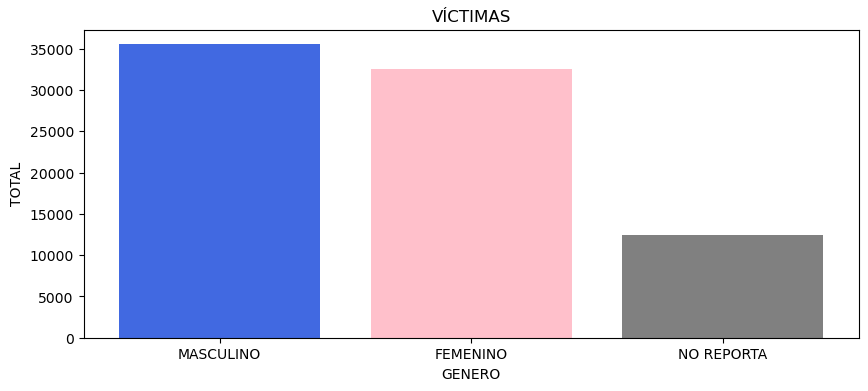

In [7]:
colores = ["royalblue","pink","gray"]
fig, ax = plt.subplots(figsize=(10,4))
ax.bar(genero.index, genero, color= colores)
ax.set_title('VÍCTIMAS')
ax.set_ylabel('TOTAL')
ax.set_xlabel('GENERO')

## **¿Cuales son las clasificaciones de delito?**

In [8]:
delitos = df['CLASIFICACIONES DELITO'].value_counts()
print(delitos)

Lesiones no fatales    77374
Violencia sexual        2135
Lesiones fatales         993
Name: CLASIFICACIONES DELITO, dtype: int64


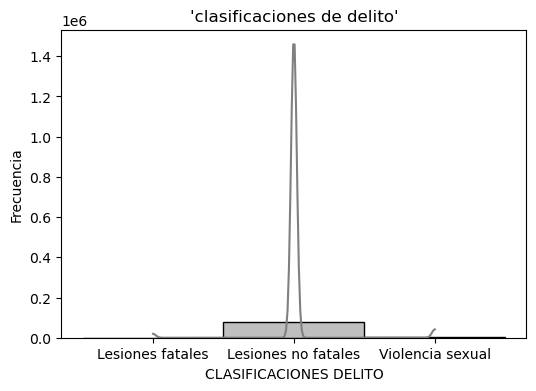

In [9]:
delitos = df['CLASIFICACIONES DELITO']
plt.figure(figsize=(6, 4))  
sns.histplot(data=delitos, bins=20, kde=True, color="gray")  
plt.ylabel("Frecuencia")
plt.title("'clasificaciones de delito'")
plt.show()

## **¿Cuantos son los incidentes por zona?**

In [10]:
zona=df.ZONA.value_counts()
zona

URBANA        77498
NO REPORTA     2189
RURAL           701
OTROS           114
Name: ZONA, dtype: int64

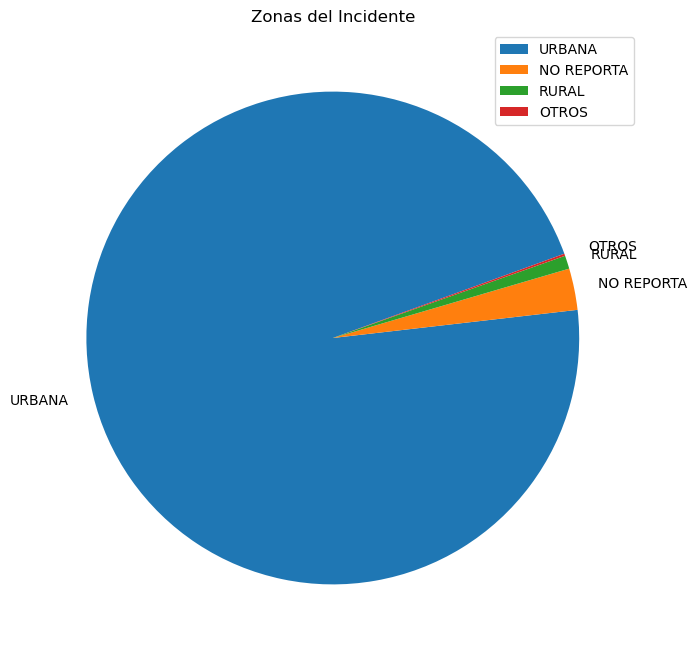

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(zona, labels=zona.index, autopct='', startangle=20)
plt.title('Zonas del Incidente')
plt.legend(zona.index, loc='upper right')
plt.show()

## **¿De qué género son las victimas por zona?**

<Axes: xlabel='GENERO', ylabel='Count'>

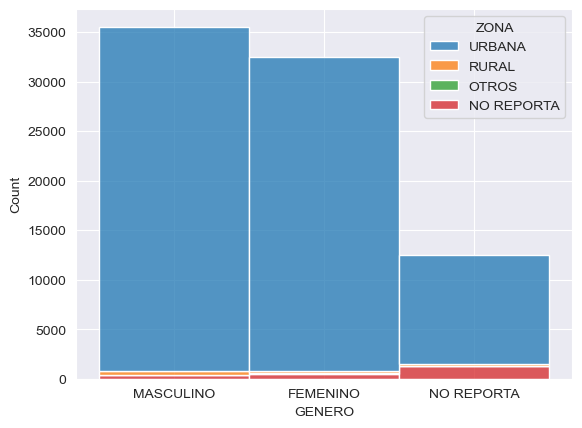

In [12]:
sns.set_style("darkgrid")
sns.histplot(data=df, x="GENERO", hue="ZONA", multiple="stack")

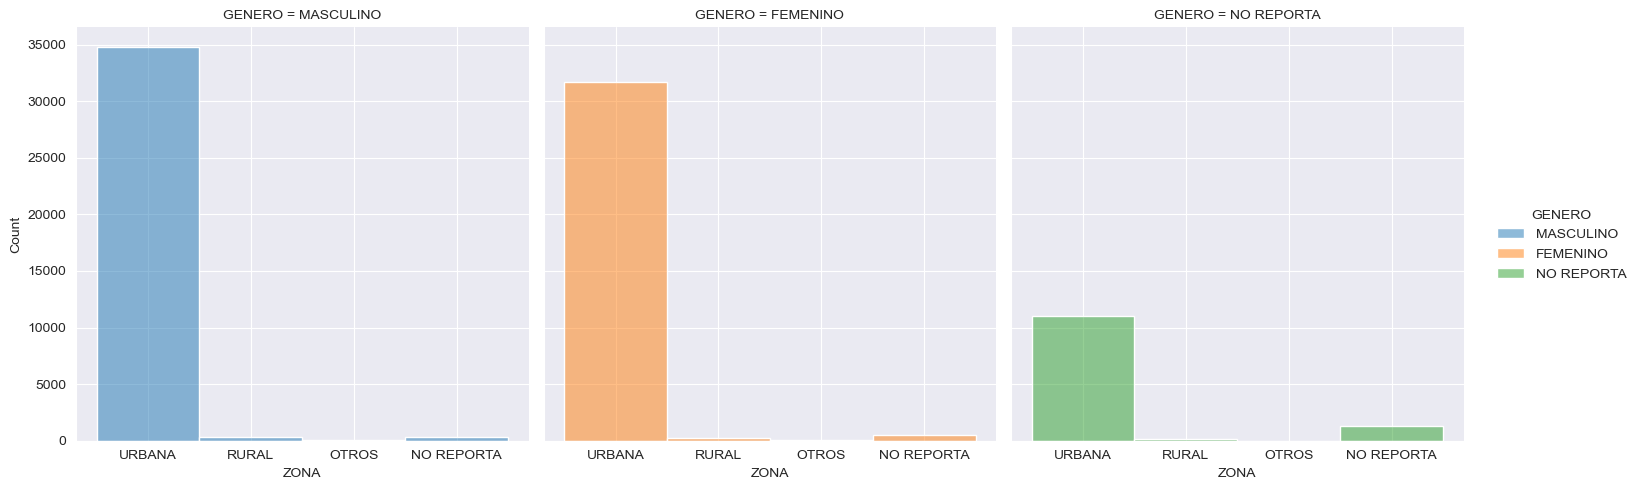

In [13]:
sns.displot(data=df, x="ZONA", hue="GENERO", col="GENERO")

## **¿Cuales son los medios utilizados en los incidentes?**

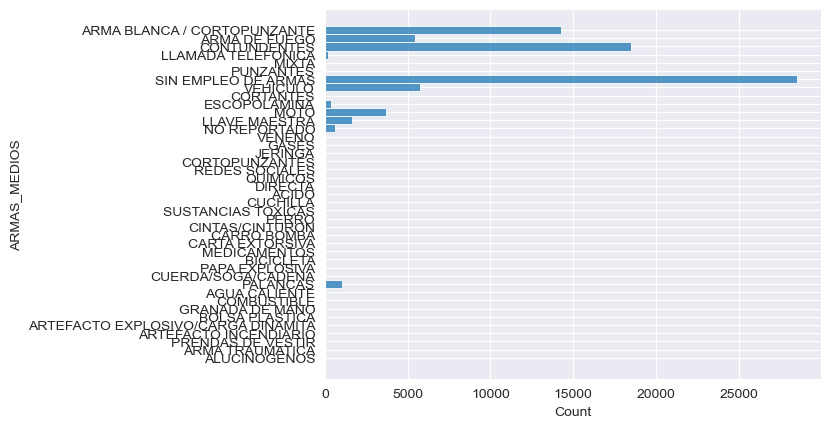

<Figure size 1000x600 with 0 Axes>

In [36]:
sns.histplot(data=df, y="ARMAS_MEDIOS")
plt.figure(figsize=(10, 6))
ax.tick_params(axis='y', labelsize=1)